In [1]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(tidyverse)
library(readr)
library(ggplot2)
options(repr.matrix.max.rows = 6)
source('cleanup.R')

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

ERROR: Error in file(filename, "r", encoding = encoding): cannot open the connection


In [2]:
player_data <- read_csv("https://raw.githubusercontent.com/Laiann/25_Final_Group_Project_Section_003/refs/heads/main/players.csv")
player_data

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
⋮,⋮,⋮,⋮,⋮,⋮,⋮
Amateur,FALSE,d572f391d452b76ea2d7e5e53a3d38bfd7499c7399db299bd4fedb06a46ad5bb,0.0,Dylan,Prefer not to say,57
Amateur,FALSE,f19e136ddde68f365afc860c725ccff54307dedd13968e896a9f890c40aea436,2.3,Harlow,Male,17
Pro,TRUE,d9473710057f7d42f36570f0be83817a4eea614029ff90cf50d8889cdd729d11,0.2,Ahmed,Other,NA


In [4]:
#Wrangle:
clean_player_data <- player_data |> #This opens up the player data set and is assigned to clean_player_data
select(played_hours, Age, subscribe) |> #This line of code selects the columns that we are going to use in our model 
mutate(subscribe = as_factor(subscribe))
clean_player_data


played_hours,Age,subscribe
<dbl>,<dbl>,<fct>
30.3,9,TRUE
3.8,17,TRUE
0.0,17,FALSE
⋮,⋮,⋮
0.0,57,FALSE
2.3,17,FALSE
0.2,NA,TRUE


This table shows the variables that we are going to use in our classification model, both played_hours and age are the two variables that we are going to use to predict if the individuals subscription status 

In [5]:
#Summary statistics
players_mean <- clean_player_data |> #This code line selects the clean_player_data we formed above 
    summarize(
        mean_age = round(mean(Age,na.rm=TRUE),2),
        mean_played_hours =round(mean(played_hours,na.rm=TRUE),2)) #The summarize function is collecting the mean for the variables, na.rm=TRUE removes any observations that dont have any data 

players_mean


mean_age,mean_played_hours
<dbl>,<dbl>
21.14,5.85


The table above shows summary statistics for our predictor variables (age and played_hours)

In [18]:
#Inital split will split the data up into training and testing data, the model will be trained on the training data
#The prop function allows use to set the poroption of the training data (75%) and strata is to ensure the postive classification oensure that the training and testing sets have roughly the same proportion of each class (TRUE/FALSE)
#Training funciton sets the training data set
#Testing sets the testing data set players_split <- initial_split(clean_player_data, prop = 0.75, strata = subscribe) 
set.seed(1234)

players_split <- initial_split(clean_player_data, prop = 0.75, strata = subscribe)
players_train <- training(players_split) 
players_test <- testing(players_split)

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


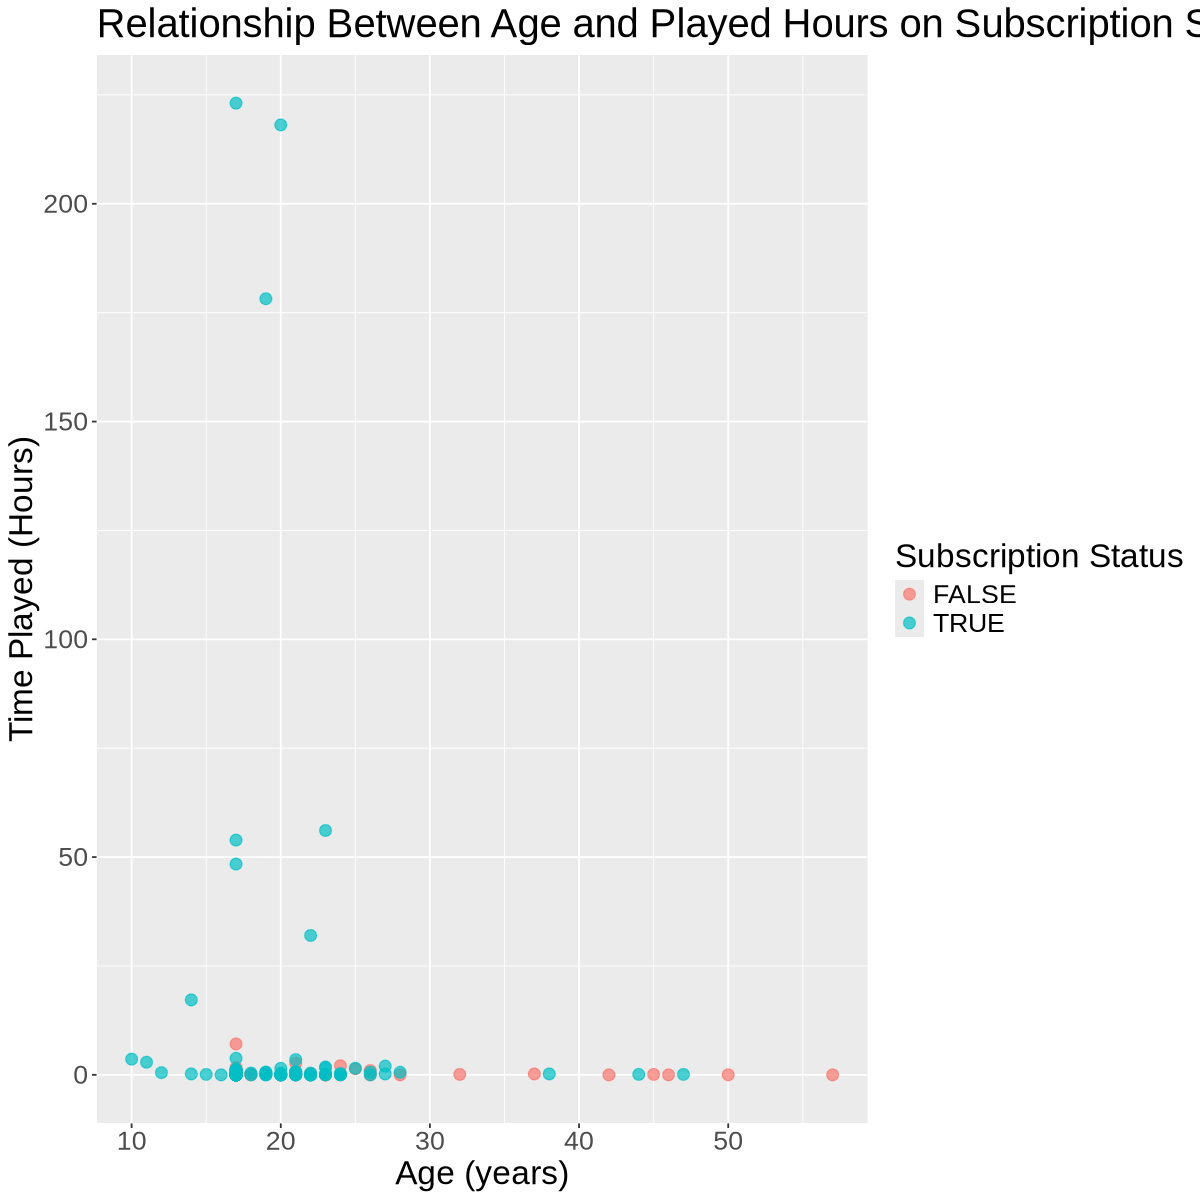

In [19]:
#Visualization 1
options(repr.plot.width = 10, repr.plot.height = 10) #This sets the plot width and height 
#The ggplot function allows us to plot the data with specific varaibles selected (Age and played hours)
#We are plotting the data on a scatterplot so we use the geom_point function
#Labs allows us to specifiy any axis labels or titles that we are going to use to ensure proper visualization techniques
players_figure_1 <- ggplot(players_train, aes(x = Age, y = played_hours, color = subscribe)) +
  geom_point(size = 3, alpha = 0.7) +
  labs(
    title = "Relationship Between Age and Played Hours on Subscription Status",
    x = "Age (years)",
    y = "Time Played (Hours)",
    color = "Subscription Status")+
theme(text = element_text(size = 20))  
players_figure_1

For Figure 1 a scatter plot was chosen in order to see the relationship between the two quantitative variables (age and hours played) and how these variables impact the subscription status. Additionally this visualisation was also used to see if there are any patterns or correlation between the variables and their effect on subscription status.

The incorporation of  alpha = 0.7 for transparency is a thoughtful design choice that addresses overplotting when taking into account two different variables being plotted against each other


Warning message:
“Removed 2 rows containing non-finite outside the scale range (`stat_count()`).”


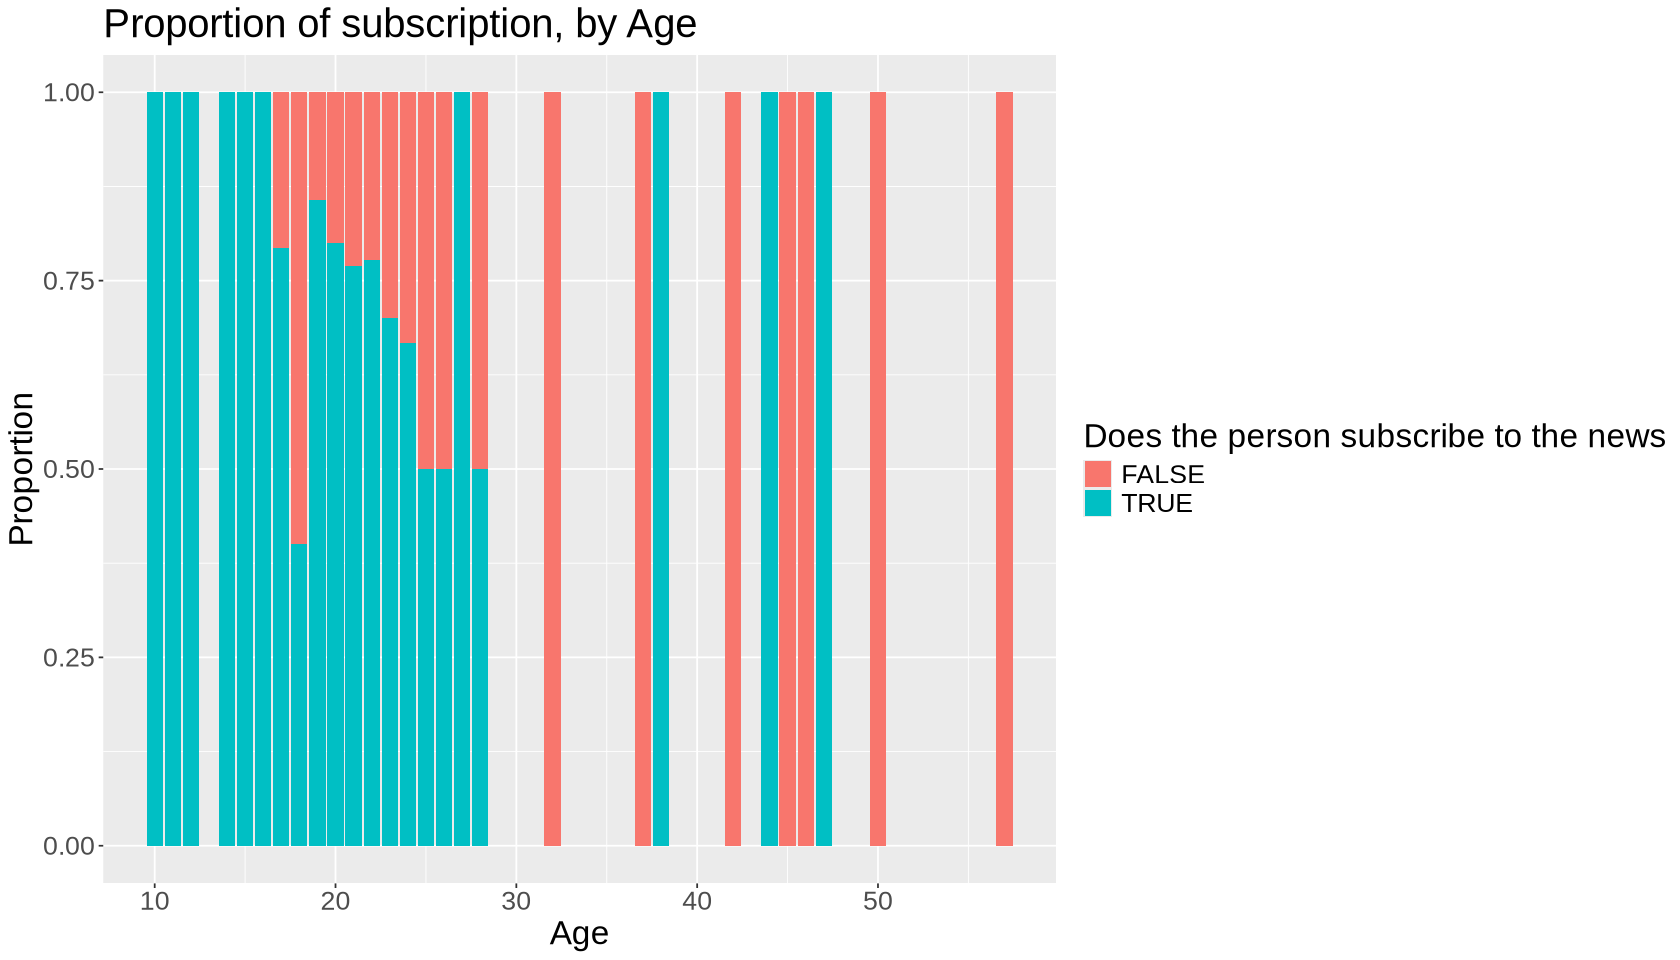

In [20]:
#Visualization 2
options(repr.plot.width = 14, repr.plot.height = 8) #This sets the plot width and height 
#The ggplot function allows us to plot the data with specific varaibles selected (Age and played hours)
#We are plotting the data on a bar plot so we use the geom_bar function
#Labs allows us to specifiy any axis labels or titles that we are going to use to ensure proper visualization techniques
players_figure_2 <- players_train|>
  ggplot(aes(x = Age, fill = factor(subscribe))) + 
  geom_bar(position = 'fill') +
  labs(x = 'Age', y ='Proportion', fill = "Does the person subscribe to the news", title ='Proportion of subscription, by Age') +
  theme(text = element_text(size = 20))  
players_figure_2 


For Figure 2 a scatter bar plot was chosen to see the relationship between the Age and whether the person will subscribe to the news. Because the age is a discrete variable, bar graph is the most appropriate visualization way to express the proportion data.

The incorporation of position = 'fill' directly compares the proportion of subscribers versus non-subscribers at each age regardless of how many players exist in that age category.


→ A | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 28 rows.
               ✖ Assigned data has 29 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 29 to size 28.

There were issues with some computations   A: x1

→ B | error:   Assigned data `orig_rows` must be compatible with existing data.
               ✖ Existing data has 27 rows.
               ✖ Assigned data has 28 rows.
               ℹ Only vectors of size 1 are recycled.
               Caused by error in `vectbl_recycle_rhs_rows()`:
               ! Can't recycle input of size 28 to size 27.

There were issues with some computations   A: x1
There were issues with some computations   A: x1   B: x1





neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4888889,3,0.06186405,Preprocessor1_Model01
1,roc_auc,binary,0.5056818,3,0.05576679,Preprocessor1_Model01
2,accuracy,binary,0.4888889,3,0.06186405,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
9,roc_auc,binary,0.3996212,3,0.06986429,Preprocessor1_Model09
10,accuracy,binary,0.5666667,3,0.06666667,Preprocessor1_Model10
10,roc_auc,binary,0.4232955,3,0.02427274,Preprocessor1_Model10


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
8,accuracy,binary,0.6111111,3,0.04444444,Preprocessor1_Model08


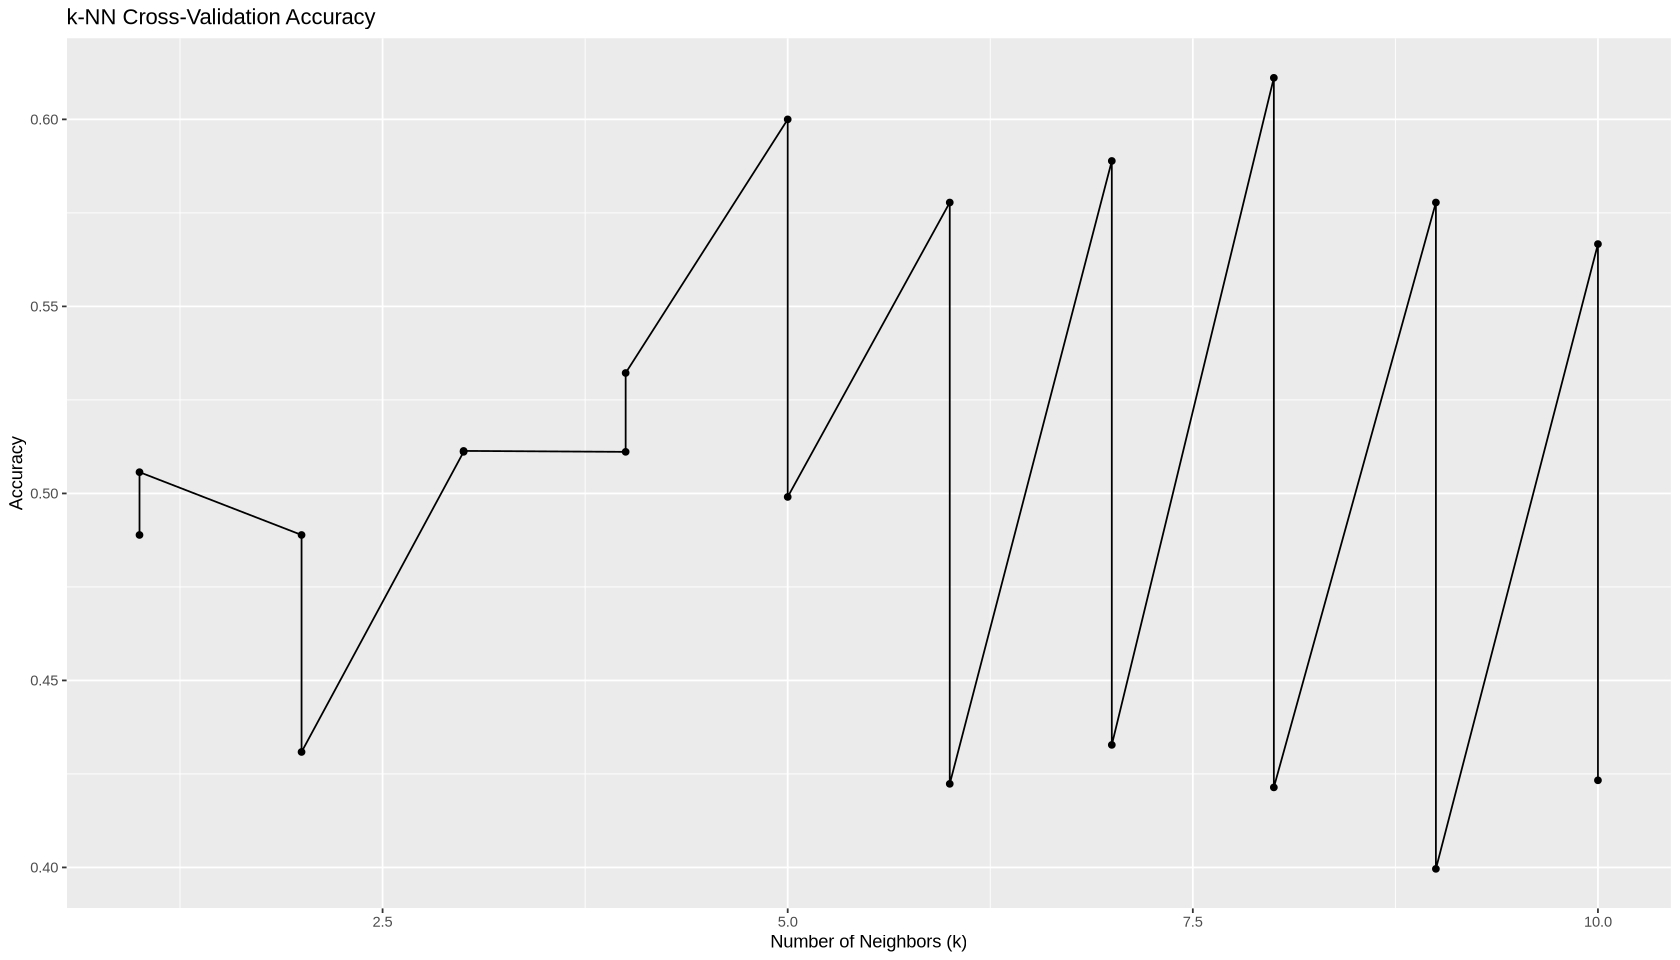

In [21]:
#Setting the seed allows to code to be reproducible
set.seed(1234)

#The recipe function allows us to set the recipe for the data with the two predictors 
#Step scale and step center are used to ensure that the variables are on similar scale so that the scale for Age or played_hours doesnt have more weight on the classifcation
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |> 
step_scale(all_predictors()) |>
step_center(all_predictors())

#Here we are applying the nearest_neighbor function to tune for the best K value to use
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
            set_engine("kknn") |>
            set_mode("classification")


#Here we are assigning the recipe for the training data and the cross validation

players_recipe <- recipe(subscribe ~., data = players_train)
players_vfold <- vfold_cv(players_train, v = 5, strata =subscribe )

k_vals <- tibble(neighbors = seq(from = 1, to = 10, by = 1))


knn_results <- workflow() |>
                 add_recipe(players_recipe) |>
                 add_model(knn_spec) |>
                 tune_grid(resamples = players_vfold, grid = k_vals) |>
                 collect_metrics()
knn_results

best_k <- knn_results |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1)

best_k


cross_val_plot <- knn_results |>
  ggplot(aes(x = neighbors, y = mean)) +
  geom_point()+
  geom_line() +
  labs(
    title = "k-NN Cross-Validation Accuracy",
    x = "Number of Neighbors (k)",
    y = "Accuracy"
  ) 

cross_val_plot

There is a missmatch between the number of rows in the existing data and assigned data, however this does not impact the model and so therefore...

Additionally the code for the best k matches with the elbow plot therefore proving the best neighbour is 8. 

In [27]:
# Creating new tibble based on testing data and best neighbour (8) in order to test the new observation
player_spec <- nearest_neighbor(
  weight_func = "rectangular",
  neighbors = 8
) |>
  set_engine("kknn") |>
  set_mode("classification")

player_fit <- player_spec |>
  fit(subscribe ~ ., data = players_test)


player_predictions<-predict(player_fit, new_data=players_test)|>
    bind_cols(players_test)

player_metrics<-player_predictions|>
    metrics(truth=subscribe, estimate=.pred_class)

player_conf_mat<-player_predictions|>
    conf_mat(truth=subscribe, estimate=.pred_class)

In [28]:
# Predicting new observation (Player age 25, hours played 55 hours)
new_player<-tibble(Age=25, played_hours=55)
player_predicted<-predict(player_fit,new_player)

player_predicted

.pred_class
<fct>
TRUE


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


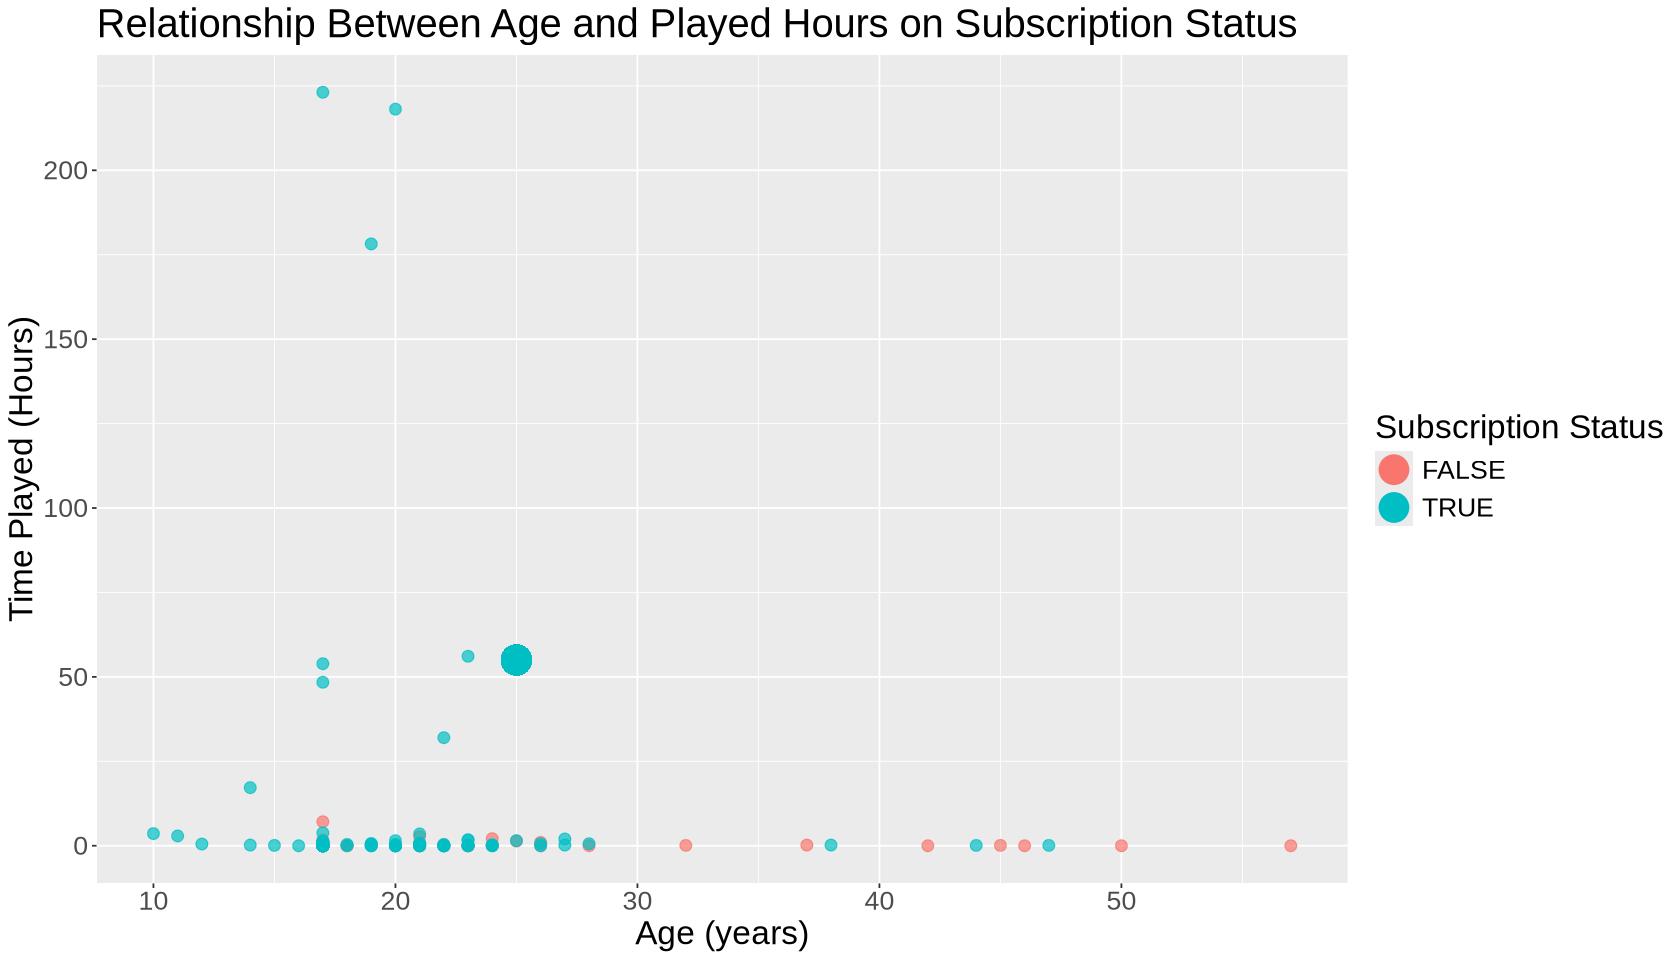

In [32]:
# Seeing if prediction is correct
players_figure_1 + 
    geom_point(aes(x =25 , y = 55, color = subscribe), size = 8)

In [ ]:
Prediction is correct based off of....
recall, predict, accuracy